# Q1: What are the key features of the wine quality data set? Discuss the importance of each feature in predicting the quality of wine.
The wine quality data set typically contains features related to different chemical properties of wines, such as acidity levels, residual sugar, pH, alcohol content, etc. Each feature plays a role in determining the overall quality of the wine.

Fixed Acidity: It indicates the total amount of acids in the wine. Acidity affects the taste and preservation of the wine. Too high acidity might lead to a sour taste.

Volatile Acidity: It refers to the volatile acids that contribute to the wine's smell and taste. High levels can lead to unpleasant, vinegar-like flavors.

Citric Acid: It contributes to the freshness and flavor of the wine. Higher levels of citric acid might indicate a better quality wine.

Residual Sugar: This is the amount of sugar remaining after fermentation. It can impact the sweetness of the wine.

Chlorides: Excessive chloride levels can impart a salty taste to the wine. Proper balance is important.

Free Sulfur Dioxide: Sulfur dioxide acts as a preservative and an anti-oxidant. Its level can affect the wine's aging potential.

Total Sulfur Dioxide: Total sulfur dioxide is related to both free sulfur dioxide and other forms of sulfur present in the wine.

Density: It indicates the density of the wine. It can be influenced by factors like alcohol content and sugar concentration.

pH: pH affects the overall taste, balance, and stability of the wine. Wines with low pH might taste more acidic.

Sulphates: Sulphates are additives that can contribute to the wine's preservation. Appropriate levels are important.

Alcohol: Alcohol content can influence the wine's body and perceived sweetness.

Quality: This is the target variable, representing the overall quality of the wine. It's often a score assigned by wine experts or based on sensory evaluation.

Each feature contributes to the wine's overall sensory experience, taste, and quality. The combination of these features helps in predicting the wine's quality.

#Q2: How did you handle missing data in the wine quality data set during the feature engineering process? Discuss the advantages and disadvantages of different imputation techniques.
Handling missing data is crucial to maintain the quality of analysis and modeling. Different imputation techniques can be applied based on the nature of the data and the extent of missingness.

Common Imputation Techniques:

Mean/Median Imputation: Fill missing values with the mean or median of the feature. It's simple and doesn't distort the distribution much. However, it doesn't consider relationships between variables.

K-Nearest Neighbors Imputation: It fills missing values using values from the k-nearest data points. It captures relationships but can be computationally intensive.

Regression Imputation: Predict missing values using regression models based on other variables. It's effective when relationships exist between variables.

Random Imputation: Fill missing values with random values within the observed range. Can introduce noise.

Advantages and Disadvantages:

Mean/Median: Simple, but can distort relationships and variance.
K-Nearest Neighbors: Considers relationships, but computationally expensive for large datasets.
Regression: Incorporates relationships, but requires appropriate choice of predictors and might overfit.
Random: Simple, but introduces random noise.
The choice depends on the dataset, the nature of missingness, and the desired quality of imputation.
# Q3: What are the key factors that affect students' performance in exams? How would you go about analyzing these factors using statistical techniques?
Key factors affecting students' performance in exams include a combination of individual, social, and educational factors:

1. **Gender**: Gender-based differences in learning styles, interests, and approaches to studying can impact performance.
2. **Race/Ethnicity**: Socioeconomic and cultural factors can influence access to educational resources and learning experiences.
3. **Parental Level of Education**: Parents' education level can influence students' motivation, study habits, and expectations.
4. **Lunch**: Nutritional intake and overall well-being can affect cognitive function and concentration during exams.
5. **Test Preparation Course**: Students who take test preparation courses may have better study strategies and exam-taking skills.

Analyzing these factors using statistical techniques:
- **Descriptive Statistics**: Calculate means, medians, and standard deviations to understand the central tendency and variability of scores for different groups.
- **Comparative Analysis**: Perform t-tests or ANOVA to compare means across groups (e.g., gender, race/ethnicity) and identify statistically significant differences.
- **Correlation Analysis**: Calculate correlations between variables (e.g., parental education, test scores) to identify potential relationships.
- **Regression Analysis**: Use regression to model the relationship between dependent variables (test scores) and independent variables (gender, parental education, etc.).

# Q4: Describe the process of feature engineering in the context of the student performance data set. How did you select and transform the variables for your model?

Feature engineering involves selecting, transforming, and creating features to enhance the predictive power of a model.

Process Steps:
1. **Feature Selection**: Based on domain knowledge and EDA, decide which columns (variables) to include in the model. In this case, columns such as 'gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', and 'test_preparation_course' are selected.
2. **Handling Categorical Data**: Convert categorical variables (e.g., 'gender') into numerical form using encoding techniques like one-hot encoding.
3. **Feature Creation**: Create new features that might provide better insights or capture underlying patterns. For instance, you could create a 'total_score' feature by summing up math, reading, and writing scores.
4. **Feature Transformation**: Apply transformations if needed. For instance, you could transform skewed variables using log or square root transformations to achieve normality.
5. **Feature Scaling**: Normalize numerical features to ensure that they are on similar scales.
6. **Dimensionality Reduction**: Consider using techniques like PCA to reduce the dimensionality of the data while preserving important information.

Example in Python:


In [7]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA

# Load the dataset

df = pd.read_csv("stud.csv")

# Encode categorical variables
categorical_cols = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(df[categorical_cols])

# Create new features
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']

# Transform and scale numerical features
scaler = StandardScaler()
numerical_cols = ['math_score', 'reading_score', 'writing_score', 'total_score']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_features = pca.fit_transform(encoded_features.toarray())


# Q5: Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to these features to improve normality?



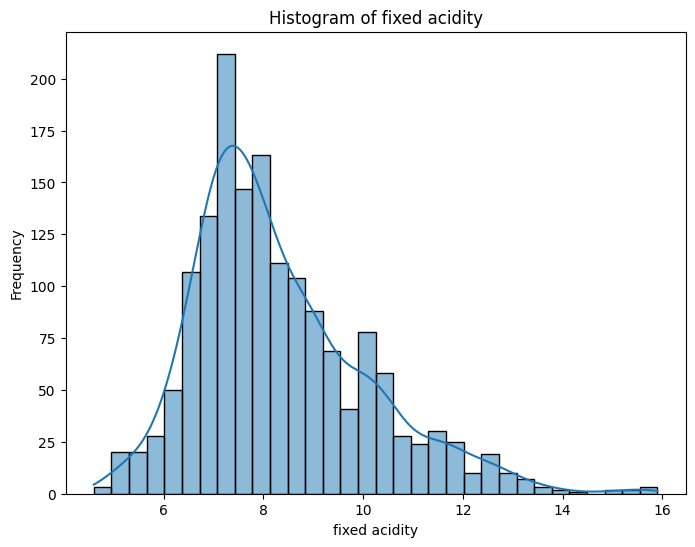

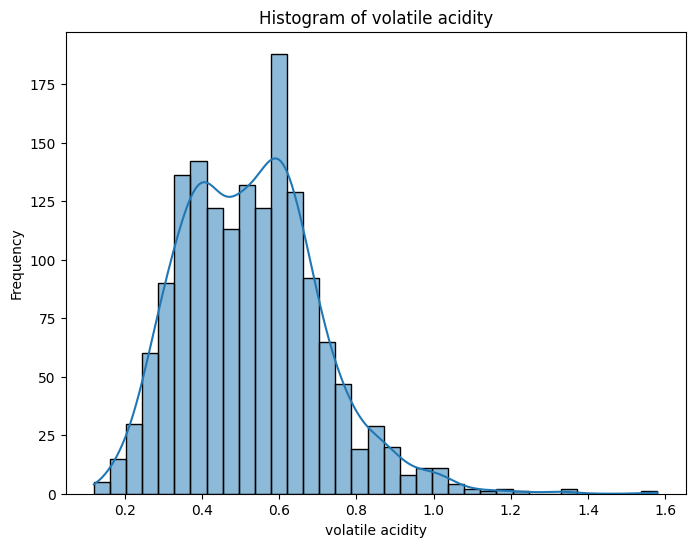

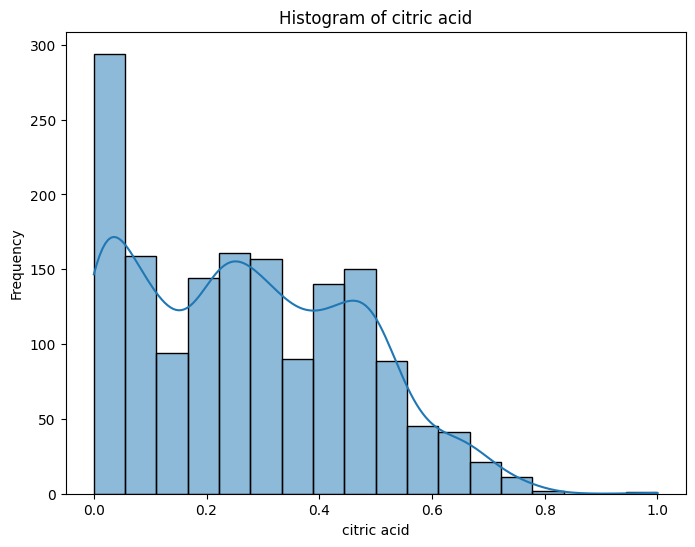

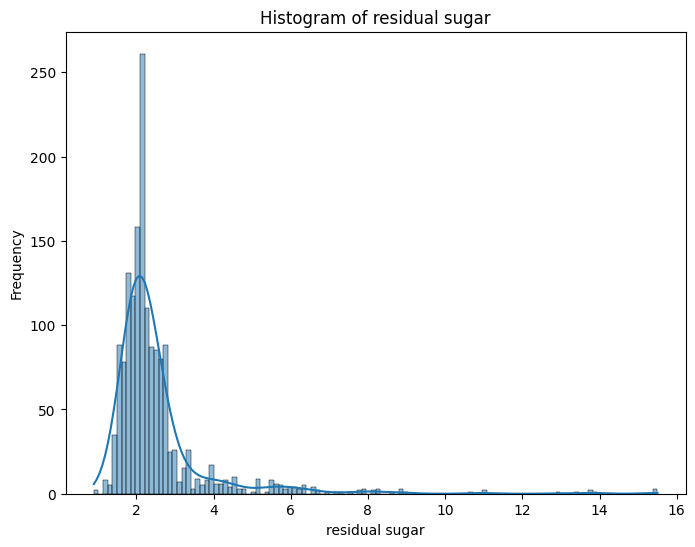

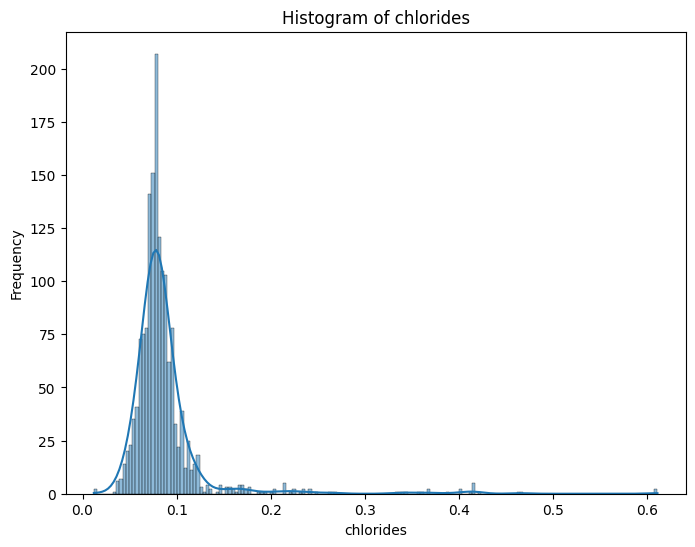

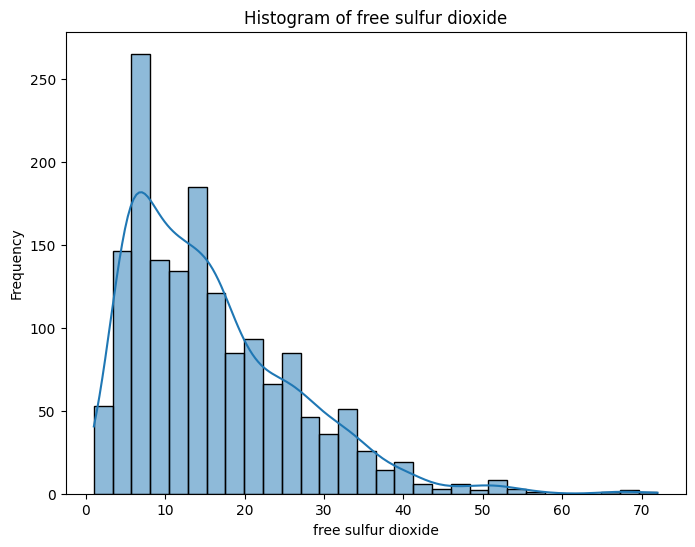

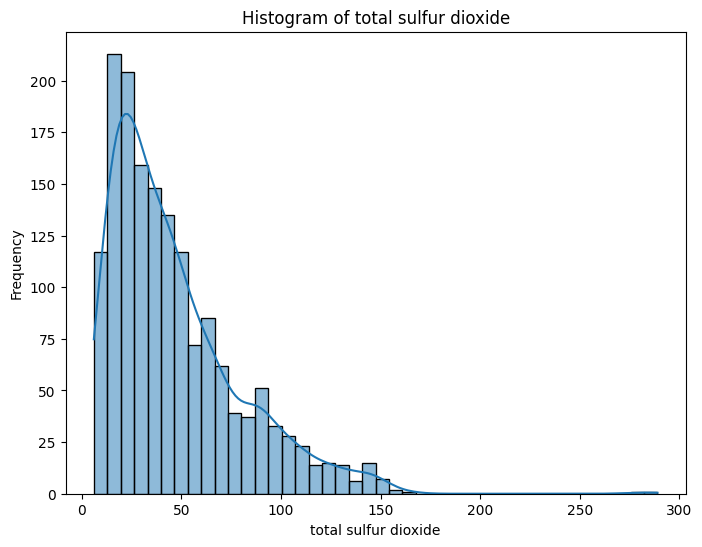

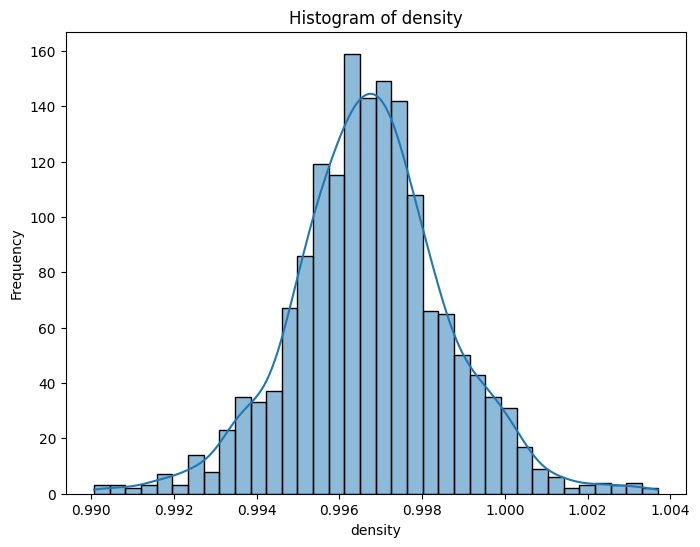

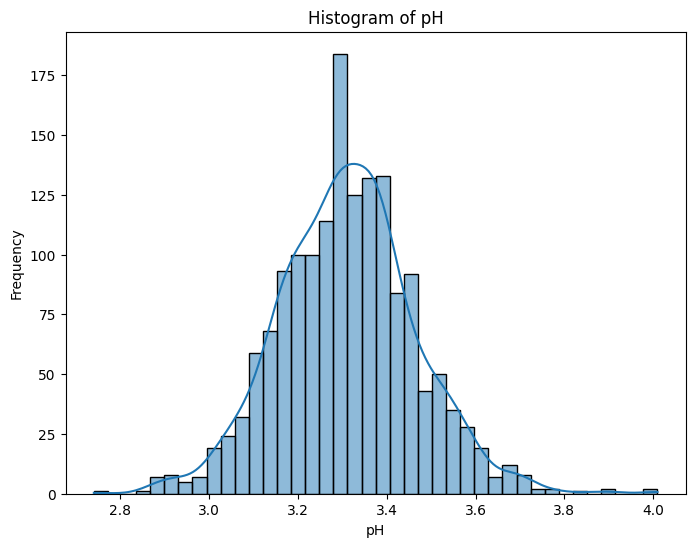

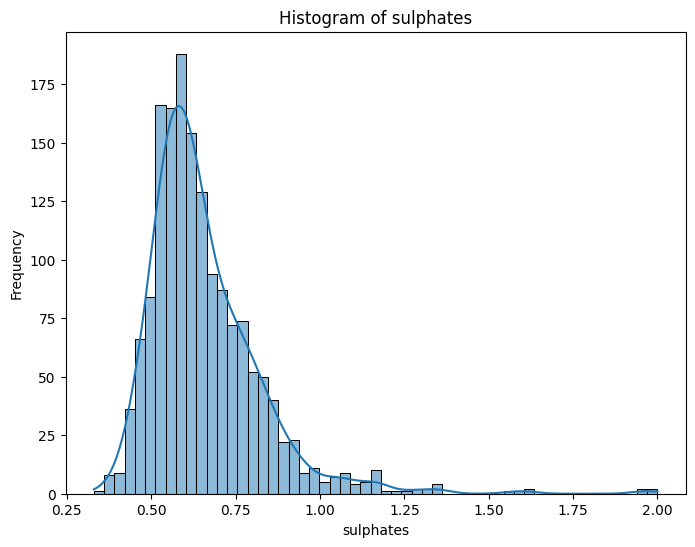

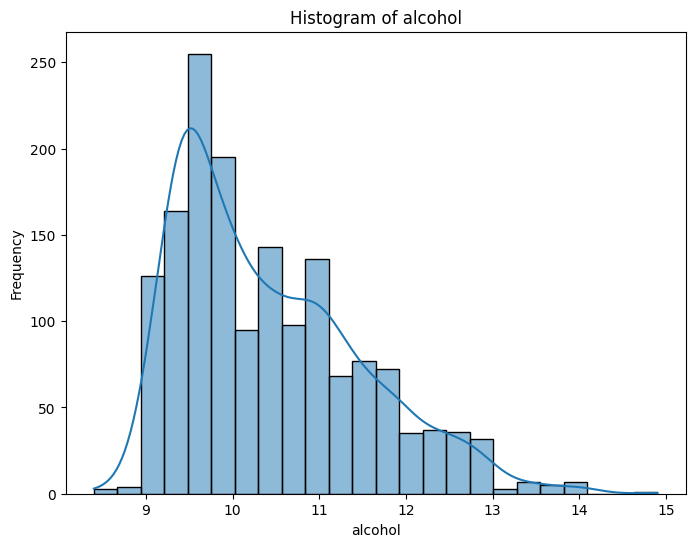

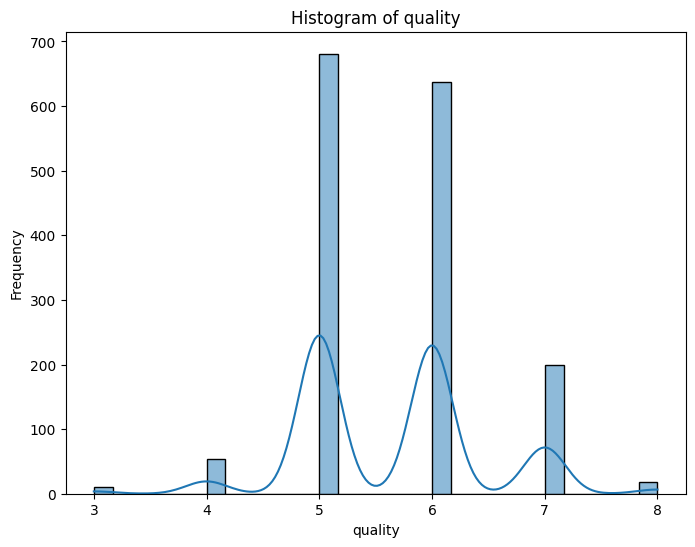

fixed acidity does not follow a normal distribution (p = 0.0000)
volatile acidity does not follow a normal distribution (p = 0.0000)
citric acid does not follow a normal distribution (p = 0.0000)
residual sugar does not follow a normal distribution (p = 0.0000)
chlorides does not follow a normal distribution (p = 0.0000)
free sulfur dioxide does not follow a normal distribution (p = 0.0000)
total sulfur dioxide does not follow a normal distribution (p = 0.0000)
density does not follow a normal distribution (p = 0.0000)
pH does not follow a normal distribution (p = 0.0000)
sulphates does not follow a normal distribution (p = 0.0000)
alcohol does not follow a normal distribution (p = 0.0000)
quality does not follow a normal distribution (p = 0.0000)


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro

# Load the wine quality dataset
df = pd.read_csv("winequality-red.csv")

# Plot histograms for each feature
for column in df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Test for normality using Shapiro-Wilk test
alpha = 0.05  # Significance level

for column in df.columns:
    stat, p = shapiro(df[column])
    if p > alpha:
        print(f'{column} follows a normal distribution (p = {p:.4f})')
    else:
        print(f'{column} does not follow a normal distribution (p = {p:.4f})')


# Q6: Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of features. What is the minimum number of principal components required to explain 90% of the variance in the data?

Explained Variance Ratios: [0.26009731 0.1868235  0.14024331 0.10125174 0.0811053  0.05521602
 0.05152648 0.04215605 0.03427563 0.02732662 0.01501822 0.00495983]
Cumulative Explained Variance: [0.26009731 0.44692081 0.58716412 0.68841586 0.76952116 0.82473718
 0.87626366 0.91841971 0.95269534 0.98002195 0.99504017 1.        ]
Minimum Number of Components for 90% Variance: 8


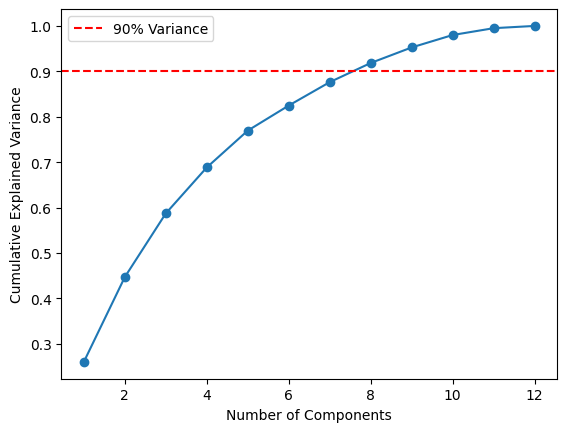

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("winequality-red.csv")
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Find the minimum number of components for 90% variance
num_components_90var = (cumulative_explained_variance >= 0.9).argmax() + 1

print("Explained Variance Ratios:", explained_variance_ratio)
print("Cumulative Explained Variance:", cumulative_explained_variance)
print("Minimum Number of Components for 90% Variance:", num_components_90var)

# Plot explained variance ratio
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance')
plt.legend()
plt.show()
